<a href="https://colab.research.google.com/github/Alphonslal/LSTM-Worksheet/blob/main/LSTM_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
uploaded = files.upload()

Saving sales of firms.xlsx to sales of firms.xlsx


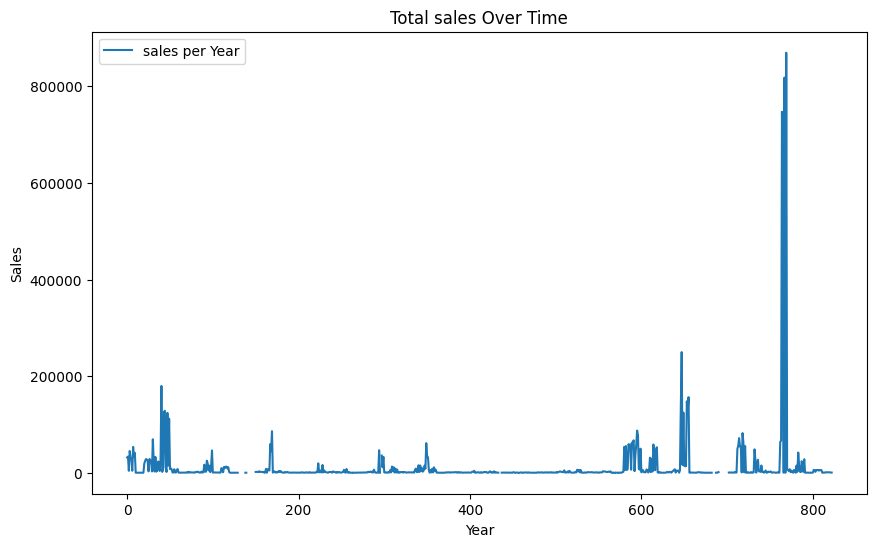

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
file_path = 'sales of firms.xlsx'
data = pd.read_excel('sales of firms.xlsx')

# Extract the sales column
series = data['sales']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(series, label='sales per Year')
plt.title('Total sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Split data into train and test sets
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

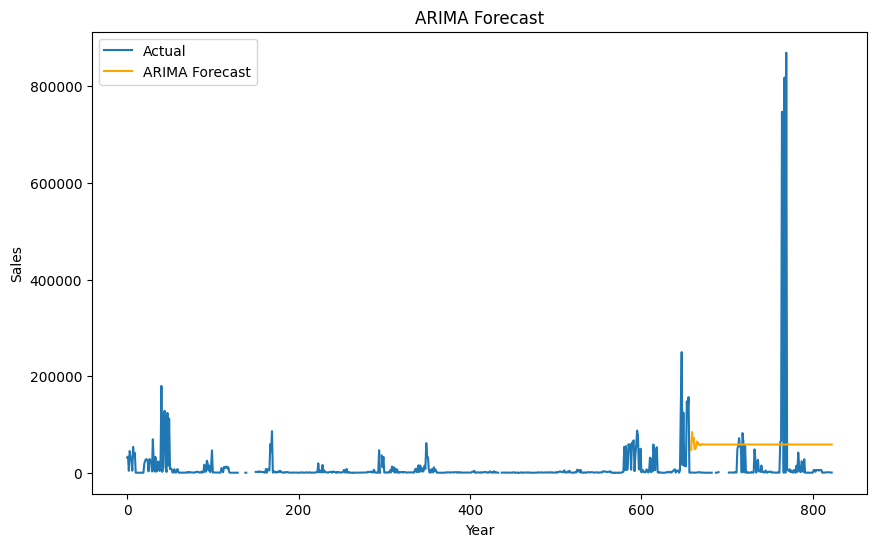

In [28]:
# ------------------ ARIMA Model ------------------
# Fit ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust the order as needed
arima_result = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_result.forecast(steps=len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: nan
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 16/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 17/50


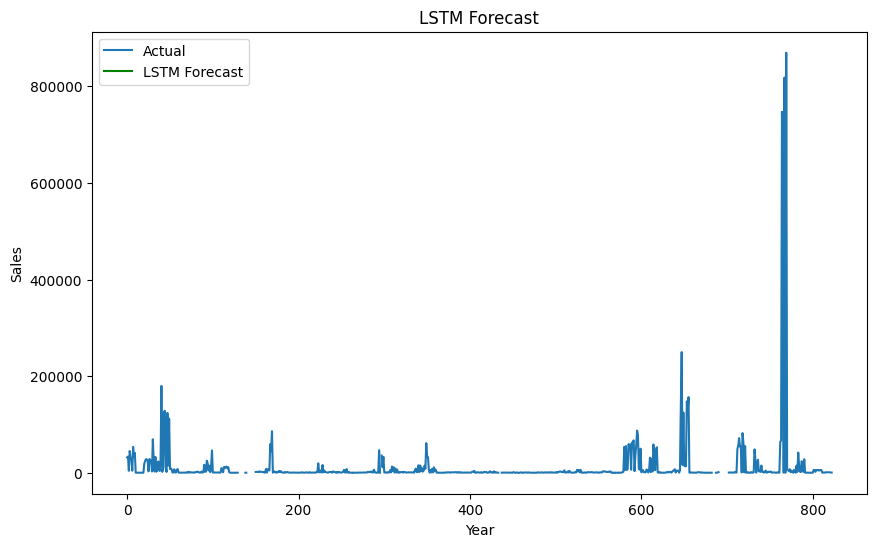

In [33]:
# ------------------ LSTM Model ------------------
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(series.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets for LSTM
# Use a new variable for train_size to avoid confusion with the ARIMA split
train_size_lstm = int(len(X) * 0.8)
X_train, X_test = X[:train_size_lstm], X[train_size_lstm:]
y_train, y_test = y[:train_size_lstm], y[train_size_lstm:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# The y_test corresponds to actual values in series starting from
# (train_size_lstm + look_back) up to (train_size_lstm + look_back + len(lstm_predictions) - 1)
start_index_for_lstm_test = train_size_lstm + look_back
end_index_for_lstm_test = start_index_for_lstm_test + len(lstm_predictions)

# Use series.index for the actual values corresponding to LSTM predictions
lstm_forecast_index = series.index[start_index_for_lstm_test : end_index_for_lstm_test]

# Plot LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(series, label='Actual')
plt.plot(lstm_forecast_index, lstm_predictions.flatten(), label='LSTM Forecast', color='green')
plt.title('LSTM Forecast')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()